In [3]:
from numpy.linalg import eig
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import plotly.express as px


import plotly.io as pio
pio.renderers.default = 'iframe_connected'

In [4]:
# Step-1 : Importing the Dataset
df = pd.read_csv('data cleaning.csv')
print(df.head)


# Step-2 : Standard Scaling
def standardScaler(data):
    '''axis=0 means along the column, axis=1 means working along the row.'''
    scaled_df = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
    return scaled_df


scaled_df = standardScaler(df)
scaled_df = np.around(scaled_df, 2)
scaled_df
print(scaled_df.head)

<bound method NDFrame.head of       Under 5 years  5 to 14 years  65 years and over  \
0              10.5           23.7               27.8   
1              21.9           21.9               31.8   
2               4.8            9.5               17.3   
3               7.7           17.9                6.3   
4               0.0           19.4               30.5   
...             ...            ...                ...   
1020            9.5           19.0               21.8   
1021           10.9           18.2               15.7   
1022            7.2           15.9               21.7   
1023            2.4           13.4               29.3   
1024            5.9            8.9               31.5   

      No certificate, diploma or degree  \
0                                   8.1   
1                                   0.0   
2                                   2.8   
3                                   7.0   
4                                   9.1   
...                        

                                                    Under 5 years  \
Under 5 years                                                1.00   
5 to 14 years                                                0.13   
65 years and over                                           -0.09   
No certificate, diploma or degree                           -0.18   
Postsecondary certificate, diploma or degree                -0.20   
No high school diploma or equivalency certificate           -0.18   
Renter                                                      -0.04   
One-maintainer household                                     0.02   
Between 7 a.m. and 7:59 a.m.                                 0.06   
African American                                             0.03   
South Asian, n.o.s.                                          0.00   
Black, n.o.s.                                                0.03   
Chinese                                                     -0.07   
Filipino                          

<AxesSubplot:>

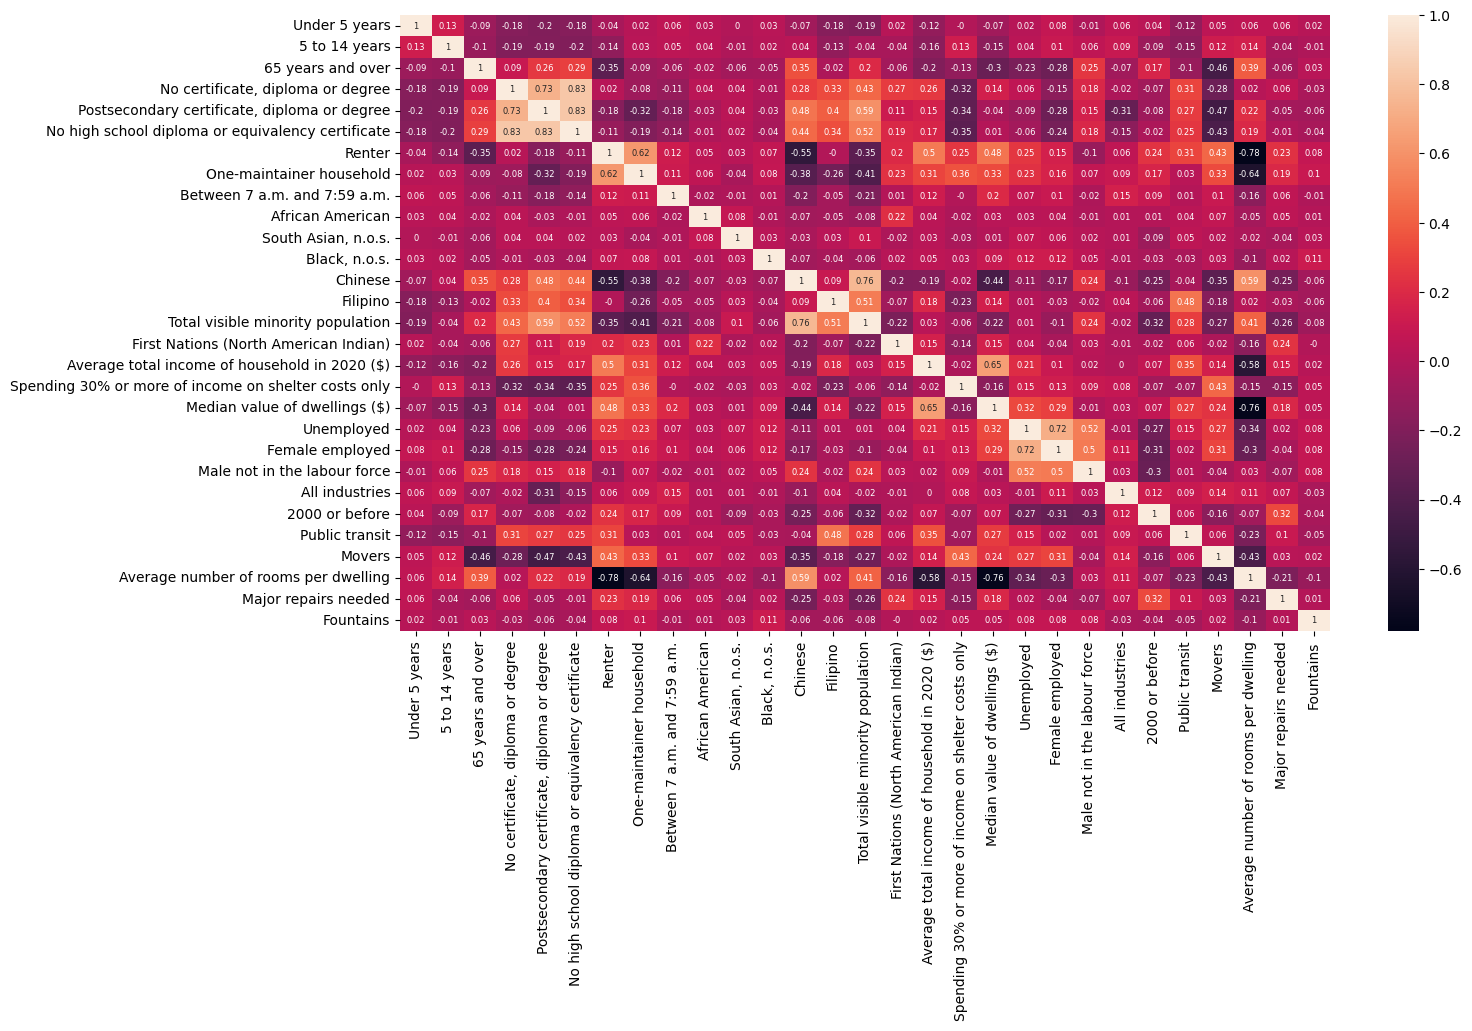

In [5]:
# Step-2 : Computing Covariance Matrix


def computeCovarianceMatrix(data):
    len_data = data.shape[0]
    covariance = data.T.dot(data)/len_data
    return covariance


cov_mat = computeCovarianceMatrix(scaled_df)
cov_mat = np.around(cov_mat, 2)
print(cov_mat)

# Plotting the Covariance Matrix as Heatmap
fig = plt.figure(figsize=(15, 8))
'''Annotate each cell with the numeric value using integer formatting'''
sn.heatmap(cov_mat.round(2), annot=True, fmt='g', annot_kws={"fontsize": 6})
# plt.show()


In [6]:
# Step-3 : Eigen Decomposition of Covariance Matrix
# Check for zero eigenvalues
eig_values, eig_vectors = np.linalg.eig(cov_mat)
if np.any(np.isclose(eig_values, 0)):
    print("Zero eigenvalues found. Handle the condition accordingly.")

print('\nNumber of Eigenvectors : %s ' % len(eig_vectors))
print('\nEigenvectors : \n\n%s' % eig_vectors)
print('\nEigenvalues : \n\n%s' % eig_values)


# Visualize above eigenvectors as a dataframe (or coefficient matrix)
eigenvec_df = pd.DataFrame(eig_vectors)
eigenvec_df.columns = ['eigvec_'+str(i+1) for i in range(0, len(eig_vectors))]
print(eigenvec_df.T)





Number of Eigenvectors : 29 

Eigenvectors : 

[[-5.86773740e-02  1.37781281e-01  2.10526255e-03  1.43070360e-01
   2.93980982e-01  4.72682207e-03  7.23445806e-02  4.84431030e-02
   3.08864118e-01  7.29749484e-02  5.32820127e-01  4.03772079e-01
  -2.10623372e-01  4.76633083e-01  6.13880463e-02  9.22567687e-02
  -1.01820100e-01 -7.65176782e-03 -1.21448932e-01 -1.61189123e-02
  -4.98869119e-02  1.78610217e-02 -2.16404556e-02  9.34099165e-03
  -4.76090366e-03 -4.04127622e-02 -2.25785510e-02 -2.46251894e-02
   5.34258751e-03]
 [-2.85983479e-02  1.70067287e-01  1.37147982e-01  2.68634389e-02
   1.45469976e-01  6.07255897e-02  2.83050700e-01 -3.97494221e-02
   3.43877618e-01 -2.83738923e-01 -3.36109828e-03  1.31495363e-01
  -2.58389743e-01 -6.66482597e-01  1.84153250e-01  2.41640486e-01
   3.82026967e-02 -8.10530158e-02  1.14144427e-02 -1.97861074e-02
  -4.15816438e-02 -1.25499190e-02 -6.93063076e-03  3.94942871e-02
  -3.12335945e-02 -1.29559613e-02 -4.30589567e-02 -8.19412661e-02
   5.5636

In [7]:
# Step-4 : Sort the eigenvalues in descending order
indexes = eig_values.argsort()[::-1]
eig_values = eig_values[indexes]
eig_vectors = eig_vectors[:, indexes]
sorted_eig_pairs = [(np.around(np.abs(eig_values[i]), 2),
                     eig_vectors[:, i]) for i in range(len(eig_values))]
print('\nSorted Eigen-pairs (descending order) :\n')

sorted_eigenValues = []
for i in range(0, len(sorted_eig_pairs)):
    print("eigenvec_{0} : {1}".format(str(i+1), str(sorted_eig_pairs[i][0])))
    sorted_eigenValues.append(sorted_eig_pairs[i][0])

print("\nTotal Variance (sum of all eigenvalues) : ",
      round(sum(sorted_eigenValues), 2))





Sorted Eigen-pairs (descending order) :

eigenvec_1 : 5.5
eigenvec_2 : 3.8
eigenvec_3 : 2.63
eigenvec_4 : 1.67
eigenvec_5 : 1.4
eigenvec_6 : 1.3
eigenvec_7 : 1.26
eigenvec_8 : 1.06
eigenvec_9 : 0.99
eigenvec_10 : 0.94
eigenvec_11 : 0.9
eigenvec_12 : 0.88
eigenvec_13 : 0.84
eigenvec_14 : 0.81
eigenvec_15 : 0.71
eigenvec_16 : 0.68
eigenvec_17 : 0.58
eigenvec_18 : 0.47
eigenvec_19 : 0.45
eigenvec_20 : 0.38
eigenvec_21 : 0.33
eigenvec_22 : 0.28
eigenvec_23 : 0.27
eigenvec_24 : 0.22
eigenvec_25 : 0.21
eigenvec_26 : 0.15
eigenvec_27 : 0.12
eigenvec_28 : 0.09
eigenvec_29 : 0.06

Total Variance (sum of all eigenvalues) :  28.98



According to Kaiser's Stopping Rule :
Number of PCs to be considered for PCA is : 8
Their Eigenvalues are : [5.5, 3.8, 2.63, 1.67, 1.4, 1.3, 1.26, 1.06]

Cumulative Variance Percentage : 
Component 1: 18.98%
Component 2: 32.09%
Component 3: 41.17%
Component 4: 46.93%
Component 5: 51.76%
Component 6: 56.25%
Component 7: 60.59%
Component 8: 64.25%
Component 9: 67.67%
Component 10: 70.91%
Component 11: 74.02%
Component 12: 77.05%
Component 13: 79.95%
Component 14: 82.75%
Component 15: 85.2%
Component 16: 87.54%
Component 17: 89.54%
Component 18: 91.17%
Component 19: 92.72%
Component 20: 94.03%
Component 21: 95.17%
Component 22: 96.14%
Component 23: 97.07%
Component 24: 97.83%
Component 25: 98.55%
Component 26: 99.07%
Component 27: 99.48%
Component 28: 99.79%
Component 29: 100.0%


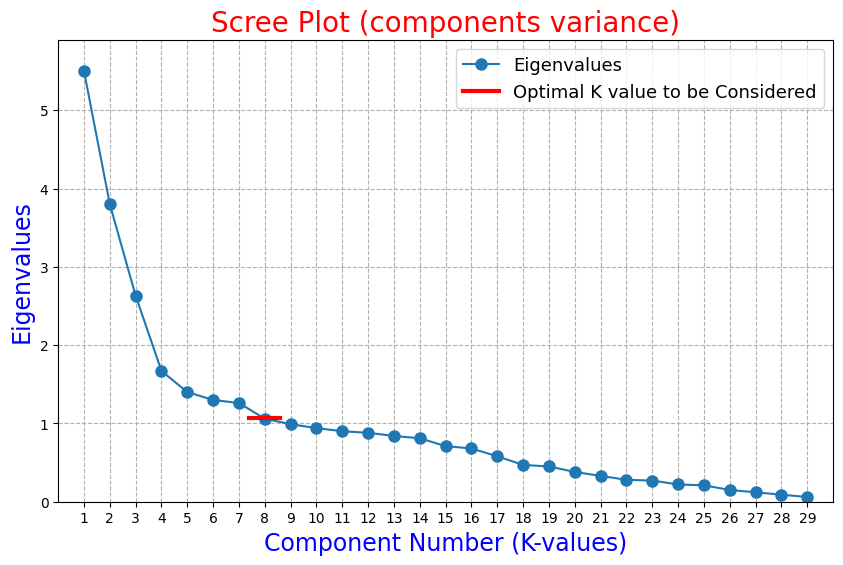

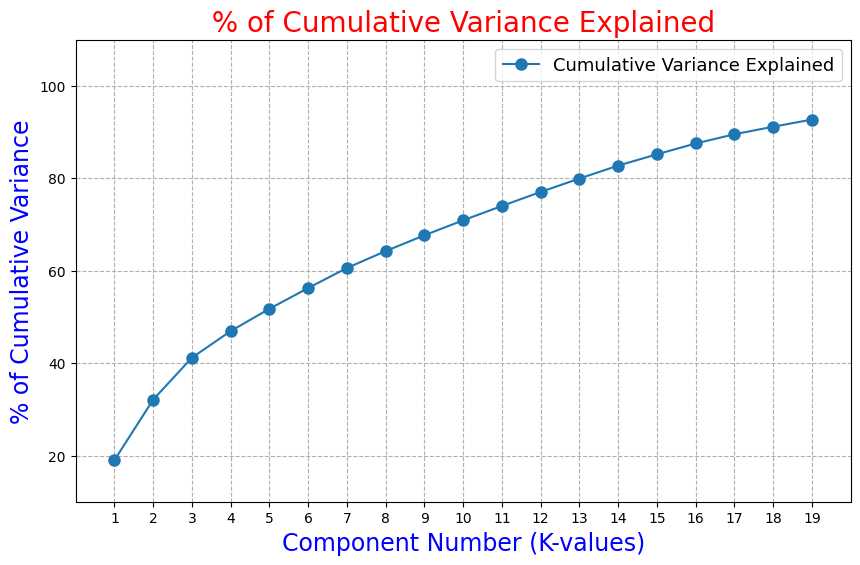

In [14]:
# Step-5 : Decide the value of "K"

# Method-1 : Kaiser’s Stopping Rule
# Simply Choose all PCs whose Eigenvalues are greater than 1
best_eig_pairs = [sorted_eig_pairs[i][0] for i in range(
    0, len(sorted_eig_pairs)) if sorted_eig_pairs[i][0] > 1.0]
print("\nAccording to Kaiser's Stopping Rule :")
print("Number of PCs to be considered for PCA is : {}".format(
    str(len(best_eig_pairs))))
print("Their Eigenvalues are : {}".format(str(best_eig_pairs)))


# Method-2 : Scree Plot
fig = plt.figure(figsize=(10, 6))
plt.title("Scree Plot (components variance)", color='Red', fontsize=20)
plt.xticks(np.arange(1, 30, 1))
plt.xlim(0, 30)
plt.ylim(0, 5.9)
plt.ylabel("Eigenvalues", fontsize=17, color='blue')
plt.xlabel("Component Number (K-values)", fontsize=17, color='blue')
plt.grid(linestyle='--')
plt.plot(range(1, len(sorted_eigenValues) + 1), sorted_eigenValues, linestyle='-',
         label="Eigenvalues", marker='o', markersize=8)
plt.plot([7.4, 8.6], [1.07, 1.07], color='red', linestyle='-',
         lw=3, label="Optimal K value to be Considered")
plt.legend(loc=1, prop={'size': 13})
# plt.show()


# Method-3 : Cumulative Variance Plot
cumulative_variance = {}
ith_cumulative_variance = 0
for i in range(0, len(sorted_eig_pairs)):
    ith_explained_variance = sorted_eig_pairs[i][0]/sum(sorted_eigenValues)
    # print(ith_explained_variance)
    ith_cumulative_variance += ith_explained_variance
    cumulative_variance[str(i+1)] = round(ith_cumulative_variance*100, 2)

print("\nCumulative Variance Percentage : ")
for component, variance in cumulative_variance.items():
    print("Component {}: {}%".format(component, variance))

fig = plt.figure(figsize=(10, 6))
plt.title(" % of Cumulative Variance Explained ", color='Red', fontsize=20)
plt.xticks(np.arange(1, 20, 1))
plt.xlim(0, 20)
plt.ylim(10, 110)
plt.ylabel("% of Cumulative Variance", fontsize=17, color='blue')
plt.xlabel("Component Number (K-values)", fontsize=17, color='blue')
plt.grid(linestyle='--')
plt.plot(range(1, 20), sorted(list(cumulative_variance.values())[:19]), linestyle='-',
         label="Cumulative Variance Explained", marker='o', markersize=8)
plt.legend(loc=1, prop={'size': 13})
plt.show()




In [9]:
# Step-6 : Projection matrix construction
K = 8
projection_matrix = np.array(
    [list(np.hstack(i[1].reshape(29, 1))) for i in sorted_eig_pairs[:]])
projection_matrix = projection_matrix[:K]
print("\nProjection-Matrix Dimension ... ", projection_matrix.shape)
print(projection_matrix)




Projection-Matrix Dimension ...  (8, 29)
[[-0.05867737 -0.02859835  0.21315922  0.1859709   0.29360418  0.26583852
  -0.29856433 -0.27896466 -0.11632735 -0.03789861  0.0020783  -0.05347608
   0.32656586  0.1315771   0.30352065 -0.05735    -0.13981642 -0.14787401
  -0.22579387 -0.15013371 -0.176823    0.04332656 -0.06663944 -0.06020856
  -0.00270492 -0.27647841  0.3298113  -0.10488288 -0.04802382]
 [ 0.13778128  0.17006729  0.0510454  -0.36628422 -0.29767593 -0.31935724
  -0.23032397 -0.09218624 -0.0011038  -0.02952551 -0.04058836 -0.02406398
   0.02242741 -0.25661746 -0.15058796 -0.1556592  -0.35139992  0.13624579
  -0.31098431 -0.15578899 -0.04639226 -0.08852735  0.04637991  0.0030888
  -0.31308693  0.03245086  0.25069201 -0.09847754 -0.00420844]
 [ 0.00210526  0.13714798 -0.08526389 -0.01535599 -0.02505515 -0.04172992
  -0.09003322 -0.02993804 -0.03541875 -0.02336074  0.0799774   0.07108492
   0.18979022  0.02473691  0.23383933 -0.13102161 -0.02777035  0.19446673
  -0.02143962  0.42

In [10]:
# Step-7 Projection Matrix as Dataframe
projection_matrix_df = pd.DataFrame(projection_matrix)
projection_matrix_df.columns = [str(i+1) for i in range(0, len(eig_vectors))]
projection_matrix_df = projection_matrix_df.set_index(
    [pd.Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'pc7', 'pc8'])])
print(projection_matrix_df)
projection_matrix_df.to_csv('PC-out put.csv')

            1         2         3         4         5         6         7  \
PC1 -0.058677 -0.028598  0.213159  0.185971  0.293604  0.265839 -0.298564   
PC2  0.137781  0.170067  0.051045 -0.366284 -0.297676 -0.319357 -0.230324   
PC3  0.002105  0.137148 -0.085264 -0.015356 -0.025055 -0.041730 -0.090033   
PC4  0.143070  0.026863  0.300599  0.138122  0.072211  0.156974 -0.056010   
PC5  0.293981  0.145470 -0.208321  0.014105 -0.073811 -0.057562 -0.214355   
PC6  0.004727  0.060726  0.339707  0.000890 -0.101189  0.017163  0.047555   
pc7  0.072345  0.283051 -0.156793  0.169239  0.005272  0.076342  0.096387   
pc8  0.048443 -0.039749  0.084080 -0.018956 -0.036947 -0.028617  0.066163   

            8         9        10  ...        20        21        22  \
PC1 -0.278965 -0.116327 -0.037899  ... -0.150134 -0.176823  0.043327   
PC2 -0.092186 -0.001104 -0.029526  ... -0.155789 -0.046392 -0.088527   
PC3 -0.029938 -0.035419 -0.023361  ...  0.421304  0.438645  0.416573   
PC4  0.210164 -0.0